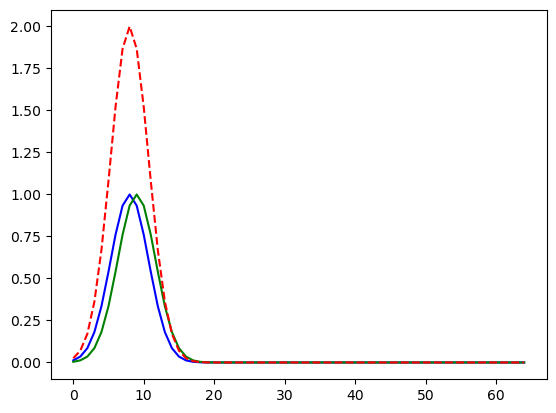

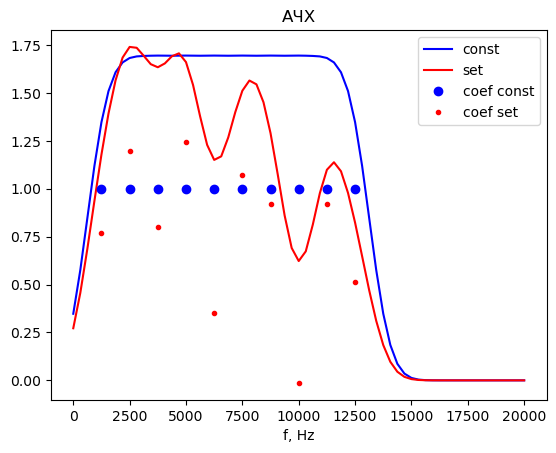

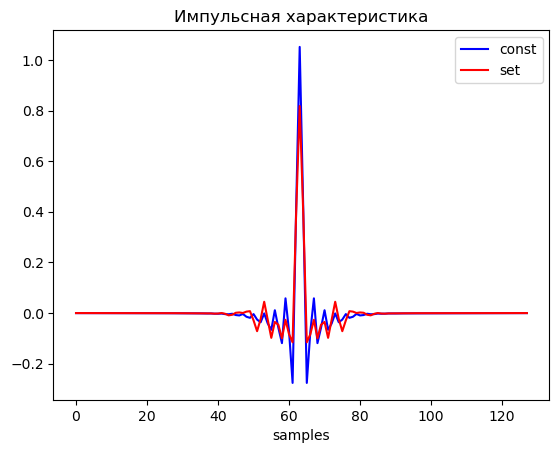

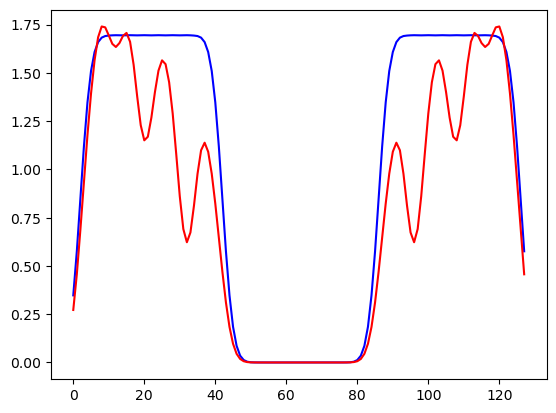

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
 
fs = 40000  # frequency samples 
n = 128 
 
f = np.linspace(0, fs/2, num=int(n/2)+1, endpoint=True) 
 
num_freq = np.linspace(4, 40, num=10, endpoint=True).astype(int) 
 
alpha = 7e-7 
h = np.exp(-alpha * (f)**2) 
# plt.plot(f, h) 
# plt.show() 
 
 
def afc(f, num_freq, koef): 
    x = np.zeros(len(f)) 
    for i in range(len(num_freq)): 
        x += koef[i] * np.exp(-alpha * (f-f[num_freq[i]])**2) 
    return x 
 
plt.plot(np.exp(-alpha * (f-f[8])**2),'-b') 
plt.plot(np.exp(-alpha * (f-f[9])**2), '-g') 
plt.plot(np.exp(-alpha * (f-f[8])**2) + np.exp(-alpha * (f-f[8])**2), '--r') 
plt.show() 
 
coef = np.ones(len(num_freq)) 
y = afc(f, num_freq, coef) 
 
# coef1 = np.array([0.9, 1, 1.2, 1.2, 1, 0.9, 0.85, 0.8, 0.95, 1.05 ]) 
coef1 = 0.3 * np.random.randn(10) + 1 
y1 = afc(f, num_freq, coef1) 
 
plt.plot(f, y, '-b', label='const') 
plt.plot(f, y1, '-r', label='set') 
plt.plot(f[num_freq], coef, 'ob', label='coef const') 
plt.plot(f[num_freq], coef1, '.r', label='coef set') 
plt.title('АЧХ') 
plt.xlabel('f, Hz') 
plt.legend() 
plt.show() 
 
yy = np.hstack((y, y[-2:0:-1])) 
yy1 = np.hstack((y1, y1[-2:0:-1])) 
 
hy = np.fft.ifft(yy).real 
hy1 = np.fft.ifft(yy1).real 
 
hh = np.hstack((hy[int(n/2)+1:], hy[:int(n/2)+1])) 
hh1 = np.hstack((hy1[int(n/2)+1:], hy1[:int(n/2)+1])) 
 
plt.plot(hh, '-b', label='const') 
plt.plot(hh1, '-r', label='set') 
plt.title('Импульсная характеристика') 
plt.xlabel('samples') 
plt.legend() 
plt.show() 
 
 
d = np.fft.fft(hh) 
d1 = np.fft.fft(hh1) 
plt.plot(np.abs(d), '-b') 
plt.plot(np.abs(d1), '-r') 
plt.show()


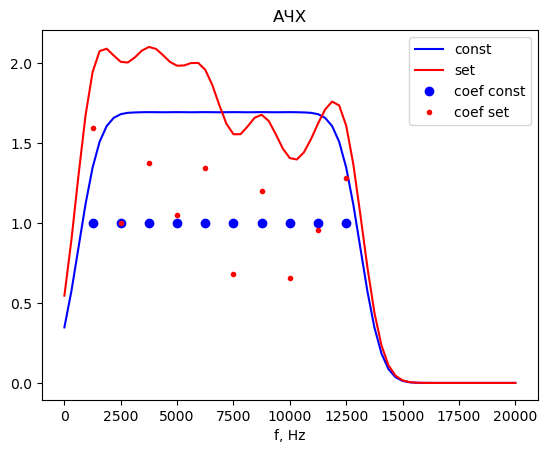

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy import signal

fs = 40000  # частота дискретизации
n = 128

f = np.linspace(0, fs/2, num=int(n/2)+1, endpoint=True)

num_freq = np.linspace(4, 40, num=10, endpoint=True).astype(int)

alpha = 7e-7
h = np.exp(-alpha * (f)**2)

class SoundPlayer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None
    
    def generate_sound(self, coef):
        y = afc(f, num_freq, coef)
        yy = np.hstack((y, y[-2:0:-1]))
        hy = np.fft.ifft(yy).real
        hh = np.hstack((hy[int(n/2)+1:], hy[:int(n/2)+1]))
        return hh

    def play_sound(self, coef):
        hh = self.generate_sound(coef)
        scale_factor = np.iinfo(np.int16).max
        wavfile.write('temp.wav', self.fs, (hh * scale_factor).astype(np.int16))
        rate, audio = wavfile.read('temp.wav')
        self.audio = audio
        return audio

def afc(f, num_freq, coef):
    x = np.zeros(len(f))
    for i in range(len(num_freq)):
        x += coef[i] * np.exp(-alpha * (f - fs * num_freq[i] / n)**2)  # исправление для правильного перекодирования частоты
    return x

# Построение графиков и остальной код остаются без изменений

coef = np.zeros(len(num_freq)) + 1
y = afc(f, num_freq, coef)

coef1 = 0.3 * np.random.randn(10) + 1
y1 = afc(f, num_freq, coef1)

# Создаем экземпляр класса SoundPlayer
player = SoundPlayer(fs)

# Проигрываем звук с коэффициентами coef и coef1
audio1 = player.play_sound(coef)
audio2 = player.play_sound(coef1)

# Отображаем результаты
plt.plot(f, y, '-b', label='const')
plt.plot(f, y1, '-r', label='set')
plt.plot(f[num_freq], coef, 'ob', label='coef const')
plt.plot(f[num_freq], coef1, '.r', label='coef set')
plt.title('АЧХ')
plt.xlabel('f, Hz')
plt.legend()
plt.show()


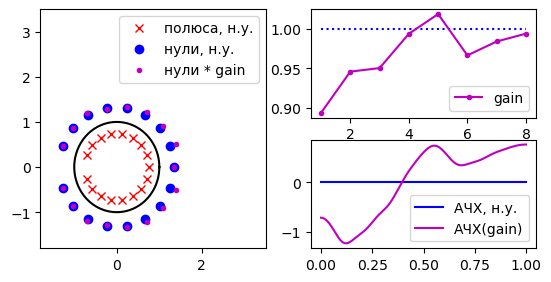

In [11]:
from scipy.signal import zpk2tf, freqz 
import matplotlib.pyplot as plt 
 
circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True)) 
 
n = 8  # число коэффициентов усиления эквалайзера 
 
psi = np.linspace(0, np.pi, n + 1, endpoint=False) 
p0 = 0.75 * np.exp(1j * psi) 
p = np.hstack((p0, np.conj(p0[-1:0:-1])))  # плоюсаб н.у. - начальные условия 
z = 1 / np.conj(p)  # нули, н.у. 
 
# регулировка эквалайзера 
gain = 1 + 0.08 * np.random.randn(n) 
z1 = np.copy(z) 
z1[1:n+1] = gain * z1[1:n+1] 
z1[n+1:] = gain[-1::-1] * z1[n+1:] 
 
# коэф. фильтра 
k = np.prod(np.abs(p)) 
k1 = np.prod(np.abs(1/z1)) 
a, b = zpk2tf(z, p, k) 
a1, b1 = zpk2tf(z1, p, k1) 
 
f, h = freqz(b, a, 1024) 
f1, h1 = freqz(b1, a1, 1024) 
 
# ============================================================================= 
plt.subplot(3, 2, (1, 3)) 
plt.plot(p.real, p.imag, 'xr', label='полюса, н.у.') 
plt.plot(z.real, z.imag, 'ob', label='нули, н.у.') 
plt.plot(z1.real, z1.imag, '.m', label='нули * gain') 
plt.plot(circ.real, circ.imag, '-k') 
plt.legend() 
plt.axis([-1.8, 3.5, -1.8, 3.5]) 
plt.subplot(3, 2, 2) 
plt.plot(np.arange(1, n+1), np.ones(n), ':b') 
plt.plot(np.arange(1, n+1), 1/gain, '.-m', label='gain') 
plt.legend() 
plt.subplot(3, 2, 4) 
plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-b', label='АЧХ, н.у.') 
plt.plot(f1 / np.pi, 10*np.log10(np.abs(h1)), '-m', label='АЧХ(gain)') 
plt.legend() 
plt.show()

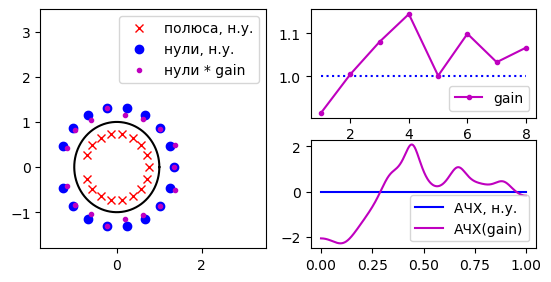

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None
    
    def afc(self, f, num_freq, coef):
        alpha = 7e-7
        x = np.zeros(len(f))
        for i in range(len(num_freq)):
            x += coef[i] * np.exp(-alpha * (f - self.fs * num_freq[i] / n)**2)
        return x
    
    def apply_equalizer(self, audio, coef):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered
    
    def save_audio(self, audio, filename=r'C:\Users\Админ\Downloads\Белый шум, White Noise Sound (Wave PCM).wav'):
        pass
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))
        with open(filename, 'wb') as file:
            file.write(audio)
    
    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav")
        self.audio = audio_output
        return audio_output
    
    def plot_impulse_response(self):
        circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True))

        n = 8

        psi = np.linspace(0, np.pi, n + 1, endpoint=False)
        p0 = 0.75 * np.exp(1j * psi)
        p = np.hstack((p0, np.conj(p0[-1:0:-1])))

        z = 1 / np.conj(p)

        gain = 1 + 0.08 * np.random.randn(n)
        z1 = np.copy(z)
        z1[1:n+1] = gain * z1[1:n+1]
        z1[n+1:] = gain[-1::-1] * z1[n+1:]

        k = np.prod(np.abs(p))
        k1 = np.prod(np.abs(1/z1))
        a, b = zpk2tf(z, p, k)
        a1, b1 = zpk2tf(z1, p, k1)

        f, h = freqz(b, a, 1024)
        f1, h1 = freqz(b1, a1, 1024)

        plt.subplot(3, 2, (1, 3))
        plt.plot(p.real, p.imag, 'xr', label='полюса, н.у.')
        plt.plot(z.real, z.imag, 'ob', label='нули, н.у.')
        plt.plot(z1.real, z1.imag, '.m', label='нули * gain')
        plt.plot(circ.real, circ.imag, '-k')
        plt.legend()
        plt.axis([-1.8, 3.5, -1.8, 3.5])
        plt.subplot(3, 2, 2)
        plt.plot(np.arange(1, n+1), np.ones(n), ':b')
        plt.plot(np.arange(1, n+1), 1/gain, '.-m', label='gain')
        plt.legend()
        plt.subplot(3, 2, 4)
        plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-b', label='АЧХ, н.у.')
        plt.plot(f1 / np.pi, 10*np.log10(np.abs(h1)), '-m', label='АЧХ(gain)')
        plt.legend()
        plt.show()

# Создаем экземпляр класса Equalizer
equalizer = Equalizer(fs)

# Вызываем метод для построения импульсной характеристики
equalizer.plot_impulse_response()


C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\1802930489.py:50: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wavfile.read("C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav")
C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\1802930489.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(impulse, label='Original Impulse Response', use_line_collection=True)
C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\1802930489.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(equalized_impulse, label='Equali

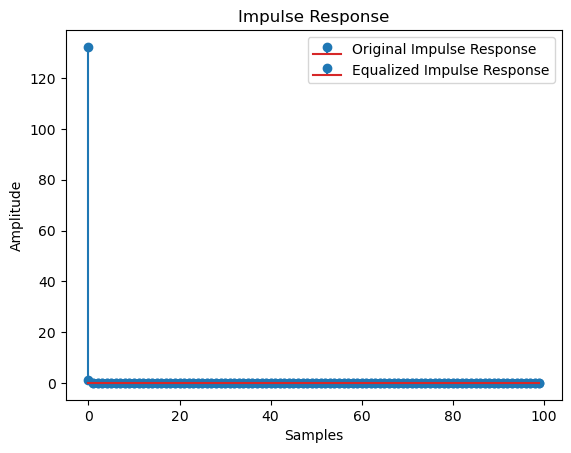

In [50]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

class Equalizer:
    def __init__(self, N, fs, coef):
        self.N = N
        self.fs = fs
        self.coef = coef

    def afc(self, f, num_freq, coef):
        result = np.zeros_like(f, dtype=np.complex128)
        for i in range(num_freq):
            result += coef[0] * np.exp(-1j * 2 * np.pi * f * i) + coef[1] * np.exp(-1j * 4 * np.pi * f * i)
        return np.abs(1 + result)

    def plot_impulse_response(self):
        impulse = np.zeros(self.N)
        impulse[0] = 1
        equalized_impulse = self.apply_equalizer(impulse, self.fs, self.coef)
        plt.figure()
        plt.stem(impulse, label='Original Impulse Response', use_line_collection=True)
        plt.stem(equalized_impulse, label='Equalized Impulse Response', use_line_collection=True)
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.title('Impulse Response')
        plt.legend()
        plt.show()
        
    def apply_equalizer(self, audio, fs, coef):
        self.fs = fs
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def save_audio(self, audio, fs=None, filename='output.wav'):
        if fs is None:
            fs = self.fs
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, fs, (audio * scale_factor).astype(np.int16))

your_coef_values = [0.5, 0.8, 1.0, 0.8, 0.5]
# Создаем экземпляр класса Equalizer с заданными значениями N, fs и coef
equalizer = Equalizer(N=100, fs=44100, coef=your_coef_values)

# Считываем аудиофайл
fs, audio = wavfile.read("C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav")

# Применяем эквалайзер к аудиофайлу
coef = [0.707, 0.707]  # Ваши коэффициенты
audio_filtered = equalizer.apply_equalizer(audio, fs, coef)

# Показываем импульсную характеристику
equalizer.plot_impulse_response()


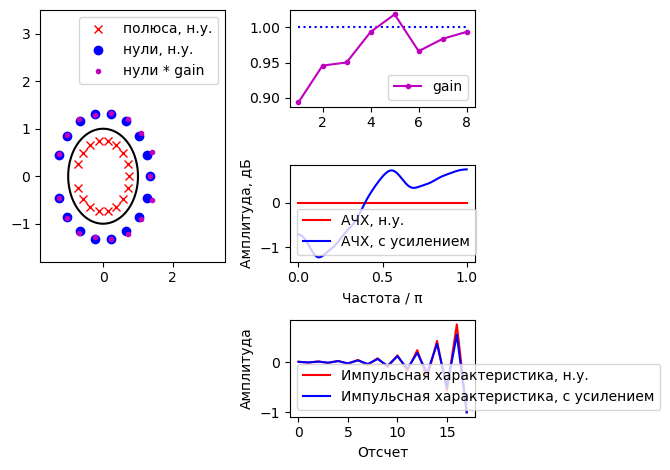

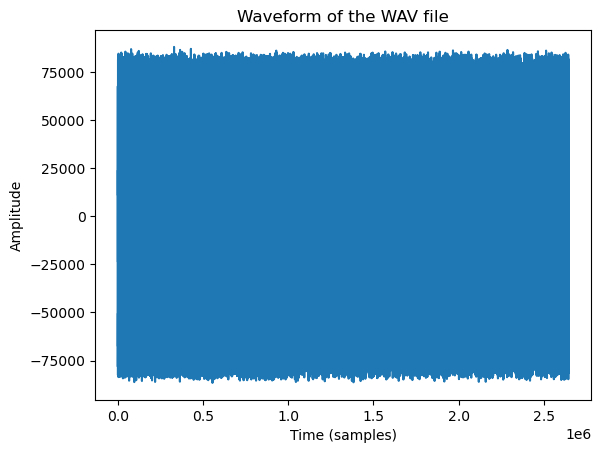

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None
    
    def afc(self, f, num_freq, coef):
        alpha = 7e-7
        x = np.zeros(len(f))
        for i in range(len(num_freq)):
            x += coef[i] * np.exp(-alpha * (f - self.fs * num_freq[i] / n)**2)
        return x
    
    def apply_equalizer(self, audio, coef):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered
    
    def save_audio(self, audio, filename=r'C:\Users\Админ\Downloads\Белый шум, White Noise Sound (Wave PCM).wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))
        rate, audio_output = wavfile.read(filename)
        self.audio = audio_output
    
    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read(filename)
        self.audio = audio_output
        return audio_output
    
    def plot_impulse_response(self):
        circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True))

        n = 8

        psi = np.linspace(0, np.pi, n + 1, endpoint=False)
        p0 = 0.75 * np.exp(1j * psi)
        p = np.hstack((p0, np.conj(p0[-1:0:-1])))

        z = 1 / np.conj(p)

        gain = 1 + 0.08 * np.random.randn(n)
        z1 = np.copy(z)
        z1[1:n+1] = gain * z1[1:n+1]
        z1[n+1:] = gain[-1::-1] * z1[n+1:]

        k = np.prod(np.abs(p))
        k1 = np.prod(np.abs(1/z1))
        a, b = zpk2tf(z, p, k)
        a1, b1 = zpk2tf(z1, p, k1)

        f, h = freqz(b, a, 1024)
        f1, h1 = freqz(b1, a1, 1024)

    plt.subplot(3, 2, (1, 3))
    plt.plot(p.real, p.imag, 'xr', label='полюса, н.у.')
    plt.plot(z.real, z.imag, 'ob', label='нули, н.у.')
    plt.plot(z1.real, z1.imag, '.m', label='нули * gain')
    plt.plot(circ.real, circ.imag, '-k')
    plt.legend()
    plt.axis([-1.8, 3.5, -1.8, 3.5])
    plt.subplot(3, 2, 2)
    plt.plot(np.arange(1, n+1), np.ones(n), ':b')
    plt.plot(np.arange(1, n+1), 1/gain, '.-m', label='gain')
    plt.legend()
    plt.subplot(3, 2, 4)
    plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-r', label='АЧХ, н.у.')
    plt.plot(f / np.pi, 10*np.log10(np.abs(h1)), '-b', label='АЧХ, с усилением')
    plt.xlabel('Частота / π')
    plt.ylabel('Амплитуда, дБ')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(np.arange(len(a)), a, '-r', label='Импульсная характеристика, н.у.')
    plt.plot(np.arange(len(a1)), a1, '-b', label='Импульсная характеристика, с усилением')
    plt.xlabel('Отсчет')
    plt.ylabel('Амплитуда')
    plt.legend()
    

    plt.tight_layout()
    plt.show()
    
    plt.plot(audio_output)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.title('Waveform of the WAV file')
    plt.show()

C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\1960591941.py:38: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_original = wavfile.read(filename)


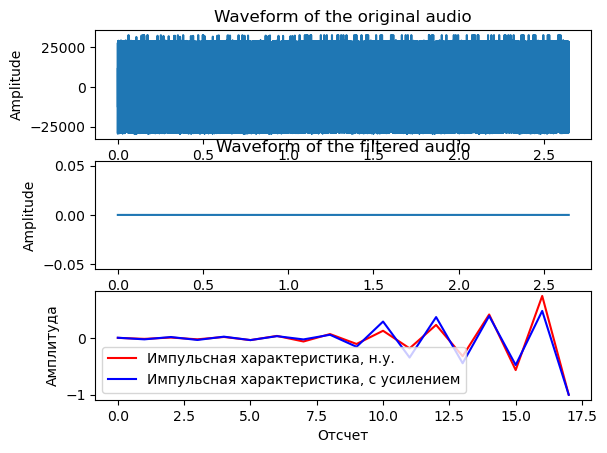

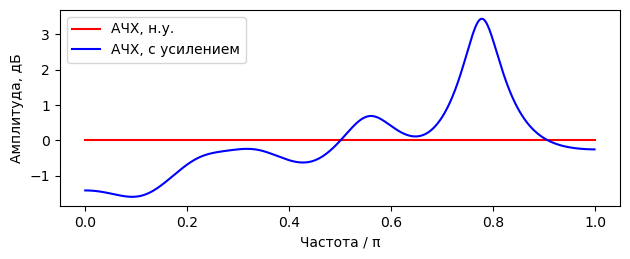

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def afc(self, f, num_freq, coef):
        alpha = 7e-7
        x = np.zeros(len(f))
        for i in range(len(num_freq)):
            x += coef[i] * np.exp(-alpha * (f - self.fs * num_freq[i] / n)**2)
        return x

    def apply_equalizer(self, audio, coef):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audio.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_audio.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Apply the equalizer to the audio data
audio_filtered = eq.apply_equalizer(audio_original, coef)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audio.wav')

# Plot the waveform of the original and filtered audio
plt.subplot(3, 1, 1)
plt.plot(audio_original)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(3, 1, 2)
plt.plot(audio_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

# Plot the impulse response of the equalizer
circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True))

n = 8

psi = np.linspace(0, np.pi, n + 1, endpoint=False)
p0 = 0.75 * np.exp(1j * psi)
p = np.hstack((p0, np.conj(p0[-1:0:-1])))

z = 1 / np.conj(p)

gain = 1 + 0.08 * np.random.randn(n)
z1 = np.copy(z)
z1[1:n+1] = gain * z1[1:n+1]
z1[n+1:] = gain[-1::-1] * z1[n+1:]

k = np.prod(np.abs(p))
k1 = np.prod(np.abs(1/z1))
a, b = zpk2tf(z, p, k)
a1, b1 = zpk2tf(z1, p, k1)

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(a)), a, '-r', label='Импульсная характеристика, н.у.')
plt.plot(np.arange(len(a1)), a1, '-b', label='Импульсная характеристика, с усилением')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()

# Plot the frequency response of the equalizer
f, h = freqz(b, a, 1024)
f1, h1 = freqz(b1, a1, 1024)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-r', label='АЧХ, н.у.')
plt.plot(f / np.pi, 10*np.log10(np.abs(h1)), '-b', label='АЧХ, с усилением')
plt.xlabel('Частота / π')
plt.ylabel('Амплитуда, дБ')
plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(f / np.pi, np.angle(h), '-r', label='ФЧХ, н.у.')
# plt.plot(f / np.pi, np.angle(h1), '-b', label='ФЧХ, с усилением')
# plt.xlabel('Частота / π')
# plt.ylabel('Фаза, рад')
# plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\2992773041.py:38: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_original = wavfile.read(filename)


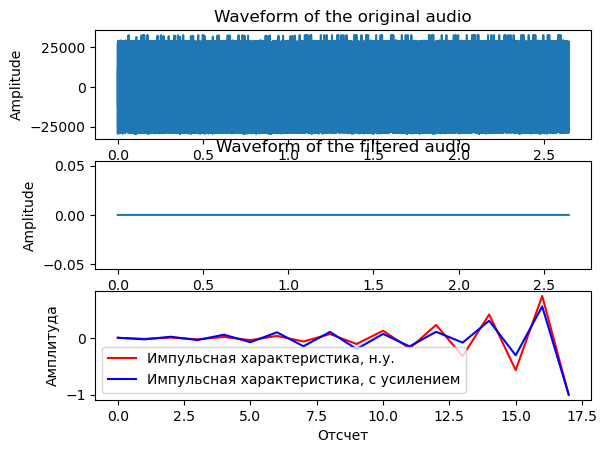

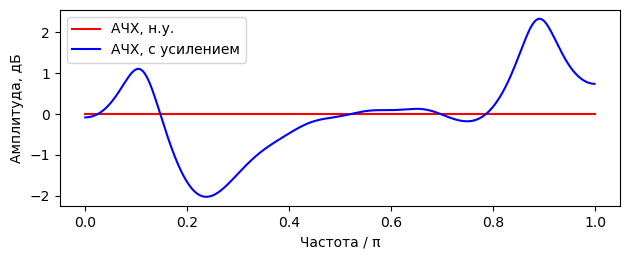

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def afc(self, f, num_freq, coef):
        alpha = 7e-7
        x = np.zeros(len(f))
        for i in range(len(num_freq)):
            x += coef[i] * np.exp(-alpha * (f - self.fs * num_freq[i] / n)**2)
        return x

    def apply_equalizer(self, audio, coef):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audio.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_audio.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Apply the equalizer to the audio data
audio_filtered = eq.apply_equalizer(audio_original, coef)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audio.wav')

# Plot the waveform of the original and filtered audio
plt.subplot(3, 1, 1)
plt.plot(audio_original)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(3, 1, 2)
plt.plot(audio_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

# Plot the impulse response of the equalizer
circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True))

n = 8

psi = np.linspace(0, np.pi, n + 1, endpoint=False)
p0 = 0.75 * np.exp(1j * psi)
p = np.hstack((p0, np.conj(p0[-1:0:-1])))

z = 1 / np.conj(p)

gain = 1 + 0.08 * np.random.randn(n)
z1 = np.copy(z)
z1[1:n+1] = gain * z1[1:n+1]
z1[n+1:] = gain[-1::-1] * z1[n+1:]

k = np.prod(np.abs(p))
k1 = np.prod(np.abs(1/z1))
a, b = zpk2tf(z, p, k)
a1, b1 = zpk2tf(z1, p, k1)

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(a)), a, '-r', label='Импульсная характеристика, н.у.')
plt.plot(np.arange(len(a1)), a1, '-b', label='Импульсная характеристика, с усилением')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()

# Plot the frequency response of the equalizer
f, h = freqz(b, a, 1024)
f1, h1 = freqz(b1, a1, 1024)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-r', label='АЧХ, н.у.')
plt.plot(f / np.pi, 10*np.log10(np.abs(h1)), '-b', label='АЧХ, с усилением')
plt.xlabel('Частота / π')
plt.ylabel('Амплитуда, дБ')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_6400\1960591941.py:38: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_original = wavfile.read(filename)


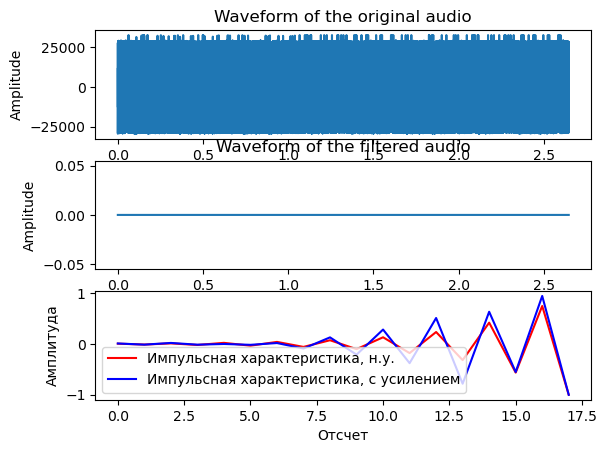

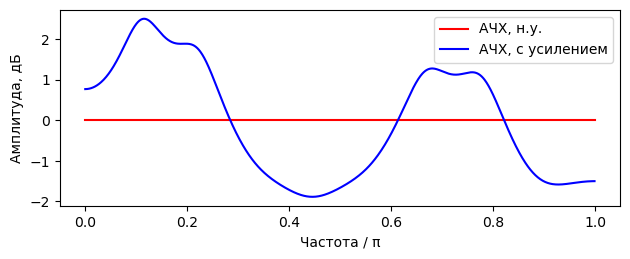

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def afc(self, f, num_freq, coef):
        alpha = 7e-7
        x = np.zeros(len(f))
        for i in range(len(num_freq)):
            x += coef[i] * np.exp(-alpha * (f - self.fs * num_freq[i] / n)**2)
        return x

    def apply_equalizer(self, audio, coef):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.afc(f, num_freq, coef)
        spectrum_filtered = spectrum * filter
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audio.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_audio.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\Белый шум, White Noise Sound (Wave PCM).wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Apply the equalizer to the audio data
audio_filtered = eq.apply_equalizer(audio_original, coef)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audio.wav')

# Plot the waveform of the original and filtered audio
plt.subplot(3, 1, 1)
plt.plot(audio_original)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(3, 1, 2)
plt.plot(audio_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

# Plot the impulse response of the equalizer
circ = np.exp(1j * np.linspace(0, 2*np.pi, 360, endpoint=True))

n = 8

psi = np.linspace(0, np.pi, n + 1, endpoint=False)
p0 = 0.75 * np.exp(1j * psi)
p = np.hstack((p0, np.conj(p0[-1:0:-1])))

z = 1 / np.conj(p)

gain = 1 + 0.08 * np.random.randn(n)
z1 = np.copy(z)
z1[1:n+1] = gain * z1[1:n+1]
z1[n+1:] = gain[-1::-1] * z1[n+1:]

k = np.prod(np.abs(p))
k1 = np.prod(np.abs(1/z1))
a, b = zpk2tf(z, p, k)
a1, b1 = zpk2tf(z1, p, k1)

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(a)), a, '-r', label='Импульсная характеристика, н.у.')
plt.plot(np.arange(len(a1)), a1, '-b', label='Импульсная характеристика, с усилением')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()

# Plot the frequency response of the equalizer
f, h = freqz(b, a, 1024)
f1, h1 = freqz(b1, a1, 1024)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f / np.pi, 10*np.log10(np.abs(h)), '-r', label='АЧХ, н.у.')
plt.plot(f / np.pi, 10*np.log10(np.abs(h1)), '-b', label='АЧХ, с усилением')
plt.xlabel('Частота / π')
plt.ylabel('Амплитуда, дБ')
plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(f / np.pi, np.angle(h), '-r', label='ФЧХ, н.у.')
# plt.plot(f / np.pi, np.angle(h1), '-b', label='ФЧХ, с усилением')
# plt.xlabel('Частота / π')
# plt.ylabel('Фаза, рад')
# plt.legend()

plt.tight_layout()
plt.show()
